Sorces:
 - https://statsthinking21.github.io/statsthinking21-python/09-StatisticalPower.html
 - https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/
 - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/

In [1]:
!pip install -r requirements.txt

# Cohens d
Cohens d is a standardized effect size for measuring the difference between two group means. Frequently, you’ll use it when you’re comparing a treatment to a control group. It can be a suitable effect size to include with t-test and ANOVA results.

Calculate Cohen’s d by taking the difference between two means and dividing by the data’s standard deviation. This measure reports the size of the mean difference by comparing it to the data’s variability.

Typically, you use the pooled standard deviation in the denominator, essentially the average standard deviation across both groups.

In [2]:
def cohensD(muA,muB,sigmaA,sigmaB):
    pooled_std=(sigmaA+sigmaB)/2
    cD=(muA+muB)/pooled_std
    return cD

In [3]:
import numpy as np
import pandas as pd

In [16]:
num1 = 150 #@param {type:"slider", min:3, max:1000, step:1}
num2 = 150 #@param {type:"slider", min:3, max:1000, step:1}
#@markdown ---
mu1 = 0 #@param {type:"slider", min:-10, max:10, step:0.01}
mu2 = 0.05 #@param {type:"slider", min:-10, max:10, step:0.01}

sigma1 = 0.1 # standard deviation
s1 = np.random.normal(mu1, sigma1, num1)
d1 = pd.DataFrame(s1, columns = ['Value'])
d1['Label'] = '1'

sigma2 = 0.1 # standard deviation
s2 = np.random.normal(mu2, sigma2, num2)
d2 = pd.DataFrame(s2, columns = ['Value'])
d2['Label'] = '2'

In [17]:
print("Cohens d is {}".format(cohensD(mu1,mu2,sigma1,sigma2)))

Cohens d is 0.5


Cohen’s d	Indicates Mean Difference is:
 - 0.5	Half the standard deviation.
 - 1	Equal to the standard deviation.
 - 2	Twice the standard deviation.
 
 Cohen’s d	Effect Size
 - 0.2	Small
 - 0.5	Medium
 - 0.8	Large

In [18]:
import seaborn as sns

<AxesSubplot: xlabel='Value', ylabel='Count'>

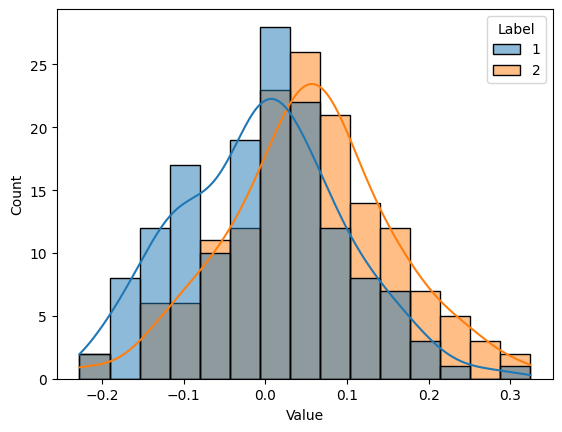

In [19]:
sns.histplot(data=pd.concat([d1,d2], ignore_index=True), x="Value", kde=True, hue="Label")

# Power analysis
We can compute a power analysis using functions from the statsmodels.stats.power package. Let’s focus on the power for an independent samples t-test in order to determine a difference in the mean between two groups. Let’s say that we think that an effect size of Cohen’s d=0.5 is realistic for the study in question (based on previous research) and would be of scientific interest. We wish to have 80% power to find the effect if it exists. We can compute the sample size needed for adequate power using the TTestIndPower() function:

In [20]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

effect = 0.5 #based on cohens D
alpha = 0.05 
power = 0.8 #how often we reject h0 hypotesis

In [21]:
power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect, power=power, alpha=alpha)
print("Sugested sample size: {}".format(sample_size))

Sugested sample size: 63.76561177540986


# Losing power
We lose power if we are forced to test with nonparametric test.
Non-parametric tests are usually almost as powerful as parametric tests in the circumstances where the parametric tests are appropriate. However, in circumstances where the parametric test may not be appropriate because its assumptions are too badly violated, the non-parametric test may be more powerful. More info here: http://www.dcscience.net/Lectures_on_biostatistics-ocr4.pdf

The normality tests are supplementary to the graphical assessment of normality (8). The main tests for the assessment of normality are:
 - Kolmogorov-Smirnov (K-S) test 
 - Lilliefors corrected K-S test 
 - Shapiro-Wilk test 
 - Anderson-Darling test 
 - Cramer-von Mises test 
 - D’Agostino skewness test 
 - Anscombe-Glynn kurtosis test 
 - D’Agostino-Pearson omnibus test 
 - Jarque-Bera test 
 
 Some researchers recommend the Shapiro-Wilk test as the best choice for testing the normality of data.

## t-test example

In [22]:
# t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# import random  
from random import sample 
data1=d1[['Value',"Label"]].sample(n=64, random_state=1)
data2=d2[['Value',"Label"]].sample(n=64, random_state=1)
print('null hypothesis: data sets are from the same distribution')
# compare samples
stat, p = ttest_ind(data1.Value, data2.Value)
print('Statistics=%.3f, p=%.16f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

null hypothesis: data sets are from the same distribution
Statistics=-3.030, p=0.0029666972824062
Different distribution (reject H0)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Custom statistical test, P_val:2.967e-03


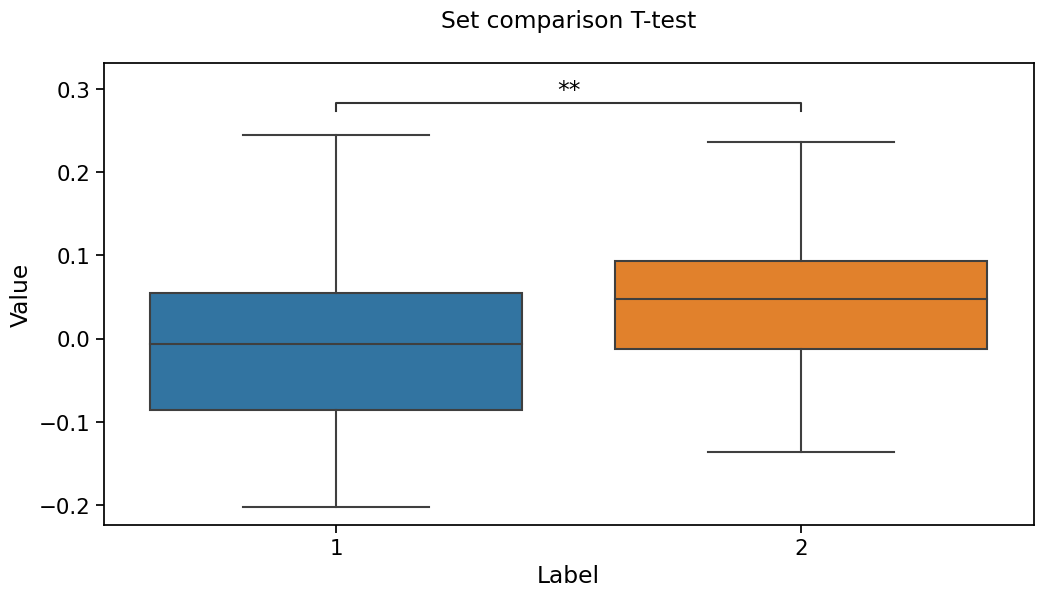

In [23]:
from statannotations.Annotator import Annotator
plotting_parameters = {
    'data':pd.concat([data1,data2], ignore_index=True), 
    'x':'Label', 
    'y':'Value', 
    'showfliers': False,
}

pairs = [('1', '2'),  # 'Robots' vs 'Flight'
        #  ('Flight', 'Sound'),   # 'Flight' vs 'Sound'
        #  ('Robots', 'Sound')   # 'Robots' vs 'Sound'
         ]

formatted_pvalues = [f"p={p:.2e}"]

with sns.plotting_context("notebook", font_scale=1.4):
    # Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    # Plot with seaborn
    sns.boxplot(ax=ax, **plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues([p])
    annotator.annotate()

    # Label and show
    plt.title("Set comparison T-test", y=1.06)
    plt.show()

## Mann Whitney test example

In [24]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# import random  
from random import sample 
data1=d1['Value'].sample(n=64, random_state=1)
data2=d2['Value'].sample(n=64, random_state=1)
print('null hypothesis: data sets are from the same distribution')
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.16f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

null hypothesis: data sets are from the same distribution
Statistics=1417.000, p=0.0026584432023135
Different distribution (reject H0)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Custom statistical test, P_val:2.658e-03


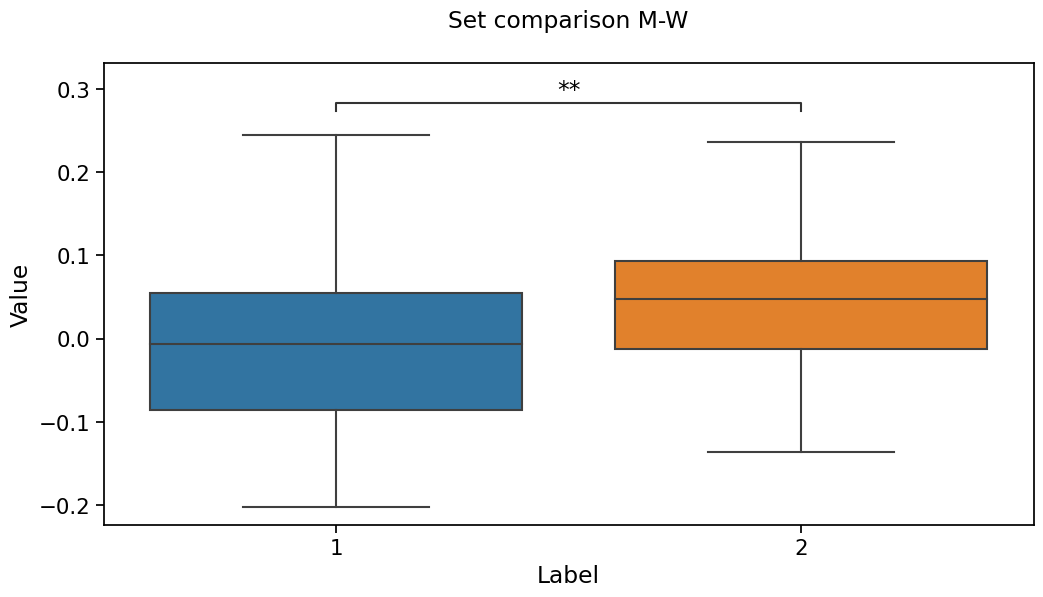

In [25]:
formatted_pvalues = [f"p={p:.2e}"]

with sns.plotting_context("notebook", font_scale=1.4):
    # Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    # Plot with seaborn
    sns.boxplot(ax=ax, **plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues([p])
    annotator.annotate()

    # Label and show
    plt.title("Set comparison M-W", y=1.06)
    plt.show()

## t-test power experiment

In [26]:
#+
num_runs = 1000
effectSize = 0.5

# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int32(np.ceil(sampleSize))

# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """
    
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
print("T-test power is {}".format(p_reject))
#-

T-test power is 0.821


## Mann Whitney power experiment

In [27]:
#+
num_runs = 1000
effectSize = 0.5

# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int32(np.ceil(sampleSize))

# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """
    
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.mannwhitneyu(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
print("Mann Whitney power is {}".format(p_reject))
#-

Mann Whitney power is 0.772
